<a href="https://colab.research.google.com/github/Hanifanur18/Data_analis/blob/main/Google_PlayStore_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation**

In [ ]:
import pandas as pd

In [ ]:
file_url = 'https://raw.githubusercontent.com/Hanifanur18/Data_analis/main/GooglePlayStore_wild.csv'
df = pd.read_csv(file_url)

In [ ]:
# get columns info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          9366 non-null   float64
 4   Reviews         10840 non-null  int64  
 5   Size            10840 non-null  object 
 6   Installs        10840 non-null  object 
 7   Type            10839 non-null  object 
 8   Price           10840 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10840 non-null  object 
 11  Last Updated    10840 non-null  object 
 12  Current Ver     10832 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.2+ MB
None


# **Data Cleaning**

In [ ]:
# Delete row with null value
df = df.dropna()

In [ ]:
# Delete some not needed columns
df = df.drop(columns = ['Unnamed: 0','Last Updated','Current Ver','Android Ver','Genres'])

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10839
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 731.2+ KB
None


In [ ]:
# Convert the app sizes ('Size') to number format (float). The sizes of all the apps must be measured in Megabytes.
def set_size(size):
   if size[-1] == 'M':
      return float(size[:-1])
   elif size[-1] == 'k':
      return float(size[:-1]) / 1024
   return -1
df['Size'] = df['Size'].apply(set_size)

In [ ]:
# Convert the app sizes ('Price') to number format (float).
def set_prices(price):
  if price == '0':
    return 0
  else:
    return float(price[1:])
df['Price'] = df['Price'].apply(set_prices)

In [ ]:
# Convert the app sizes ('Installs') to number format (int).
def set_installs(installs):
   if installs == '0':
       return 0
   return int(installs[:-1].replace(',', ''))
df['Installs'] = df['Installs'].apply(set_installs)

In [ ]:
# data preview
df.drop(columns = []).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone


# **Data visualization**

In [ ]:
# pivot table
print(round(df.pivot_table(index = 'Content Rating', columns = 'Type', values = 'Installs', aggfunc = 'mean')),1)

Type                   Free      Paid
Content Rating                       
Adults only 18+    666667.0       NaN
Everyone         16625611.0   57106.0
Everyone 10+     36289123.0  742864.0
Mature 17+       12416605.0  669548.0
Teen             33407642.0  124144.0
Unrated             50000.0       NaN 1


<Axes: ylabel='count'>

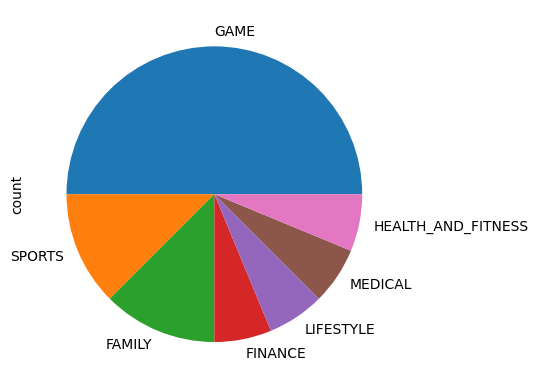

In [ ]:
# pie chart
maks_size = df['Size'].max()
df[df['Size'] == maks_size]['Category'].value_counts().plot(kind = 'pie')

In [ ]:
# combine 2 bar chart
d = df.pivot_table(index = 'Content Rating',
 	columns = 'Type',
 	values = 'Installs',
 	aggfunc = 'mean')

<Axes: ylabel='Content Rating'>

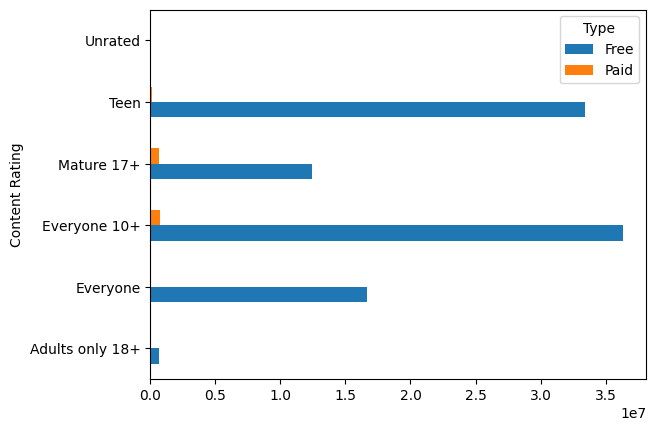

In [ ]:
d.plot(kind = 'barh')
